In [ ]:
import plotly
import plotly.plotly as py
import pandas as pd
import plotly.graph_objs as go
from os import path
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("mydf.csv")

### Plotly:

In [ ]:
import plotly.plotly as py
import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

# for col in df.columns:
#     df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# df['text'] = df['state'] + '&lt;br&gt;' +\
#     'Beef '+df['beef']+' Dairy '+df['dairy']+'&lt;br&gt;'+\
#     'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'&lt;br&gt;'+\
#     'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total'].astype(float),
        locationmode = 'USA-states',
        text = df['hover'],
        marker = dict(
            line = dict (
                color = 'rgb(0,0,0)',
                width = 1
            )
        ),
        colorbar = dict(
            title = "Millions USD"
        )
    ) ]

layout = dict(
        title = 'US Energy Consumption by State&lt;br&gt;(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)

url = py.plot(fig, filename='d3-cloropleth-map')

### Matplotlib Plot 1:

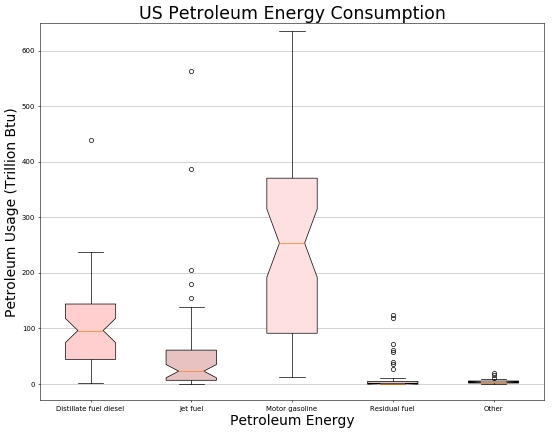

In [5]:
fig = plt.figure(figsize=(13,10),dpi = 50)
ax = plt.subplot()
petroleum_use = [df["Distillate fuel - diesel (Trillion Btu)"],df["Jet fuel (Trillion Btu)"],
              df["Motor gasoline (Trillion Btu)"], df["Residual fuel (Trillion Btu)"], 
              df["Other (Trillion Btu)"]]
labels = ["Distillate fuel diesel", "Jet fuel", "Motor gasoline",
          "Residual fuel", "Other"]
bplot = ax.boxplot(petroleum_use, patch_artist=True, labels=labels, 
                   notch=True)
ax.set_title('US Petroleum Energy Consumption',fontsize=25)
ax.set_xlabel('Petroleum Energy', fontsize = 20)
ax.set_ylabel('Petroleum Usage (Trillion Btu)', fontsize = 20)
axes = plt.gca()
axes.set_ylim([-30,650])
colors = ['#FFCFCF','#E8C1C1','#FFE0E1','#E8C1C3','#FFE6E8']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.grid(axis='y')
plt.show()

### Matplotlib Plot 2:

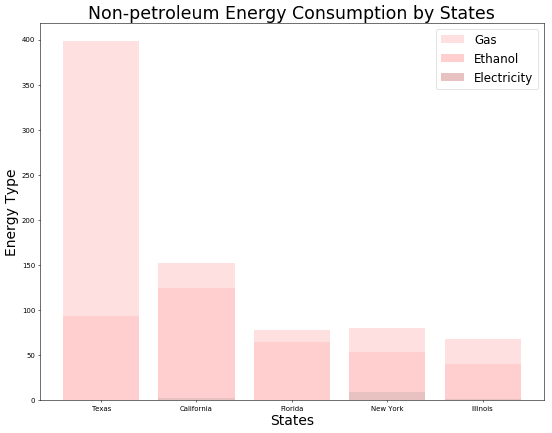

In [6]:
fig = plt.figure(figsize=(13,10),dpi = 50)
countries = ['Texas', 'California', 'Florida', 'New York', 'Illinois']
gas = np.array([304.9, 27.9, 12.8, 27.3, 27.8])
Ethanol = np.array([93.6, 121.7, 64.5, 43.5, 38.7])
Electricity = np.array([0.2, 2.9, 0.3, 9.8, 2])
ind = [x for x, _ in enumerate(countries)]

plt.bar(ind, gas, width=0.8, label='Gas', color='#FFE0E1', bottom=Ethanol+Electricity)
plt.bar(ind, Ethanol, width=0.8, label='Ethanol', color='#FFCFCF', bottom=Electricity)
plt.bar(ind, Electricity, width=0.8, label='Electricity', color='#E8C1C1')

plt.xticks(ind, countries)
plt.ylabel("Energy Type",fontsize=20)
plt.xlabel("States",fontsize=20)
plt.legend(loc="upper right",prop={'size': 17})
plt.title("Non-petroleum Energy Consumption by States",fontsize=25)

plt.show()